<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/diabetes%5BDecisionTreeRegressor%5D(fill%20Insulin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/boostcourse_data/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [ ]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [ ]:
# train 세트를 만듭니다.

train = df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [ ]:
# test 세트를 만듭니다.

test= df[df['Insulin']==0].copy()
test.shape

(374, 9)

##EDA

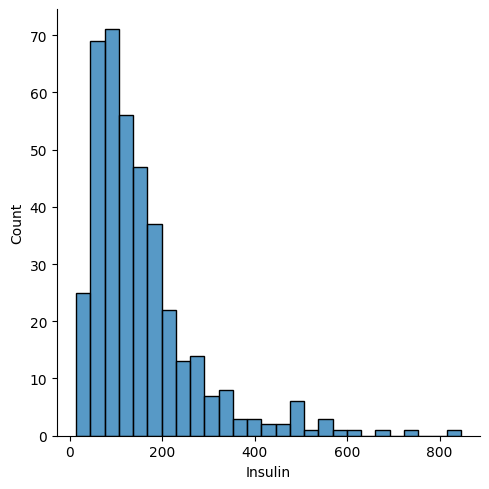

In [ ]:
sns.displot(train['Insulin'])

<Axes: xlabel='Insulin'>

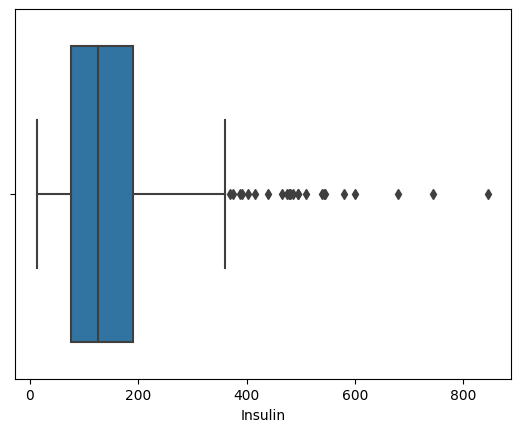

In [ ]:
sns.boxplot(x=train['Insulin'])

In [ ]:
desc= train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [ ]:
#IQR : 3IQR - 1IQR
#OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc['75%']- desc.loc['25%']
OUT = desc.loc['75%'] +(IQR * 1.5)

In [ ]:
train[train['Insulin']>OUT].shape

(24, 9)

In [ ]:
print(train.shape)
train = train[train['Insulin']<OUT]
train.shape

(394, 9)


(370, 9)


## 학습, 예측에 사용할 컬럼

In [ ]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names= train.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [ ]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = 'Insulin'
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [ ]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
X_train.shape

(370, 8)

In [ ]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train= train[label_name]
y_train.shape

(370,)

In [ ]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [ ]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators= [DecisionTreeRegressor(random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
results = []
for estimator in estimators:
  result = []
  max_depth = np.random.randint(5,30,10)
  max_features= np.random.uniform(0.3,1.0,10)

  param_distributions = {'max_depth':max_depth, 'max_features': max_features}
  regressor = RandomizedSearchCV(estimator,
                            param_distributions,
                            scoring=None,
                            n_jobs= -1,
                            cv=5,
                            verbose=2,
                            random_state=42
                            )
  regressor.fit(X_train,y_train)


  result.append(estimator.__class__.__name__)
  result.append(regressor.best_params_)
  result.append(regressor.best_estimator_)
  result.append(regressor.best_score_)
  result.append(regressor.cv_results_)
  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
df_cv=pd.DataFrame(results)
df_cv.columns = ['model','params','estimator','score','cv_result']
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.8727297676607759, 'max_dept...","DecisionTreeRegressor(max_depth=6, max_feature...",0.093752,"{'mean_fit_time': [0.01772198677062988, 0.0156..."
1,RandomForestRegressor,"{'max_features': 0.6609101502868426, 'max_dept...","(DecisionTreeRegressor(max_depth=13, max_featu...",0.332696,"{'mean_fit_time': [0.6495094776153565, 0.98236..."
2,GradientBoostingRegressor,"{'max_features': 0.7448680469081649, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.286538,"{'mean_fit_time': [0.19267210960388184, 0.1605..."


In [ ]:
best_estimator = df_cv.loc[1,'estimator']
best_estimator

RandomForestRegressor(max_depth=13, max_features=0.6609101502868426,
                      random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [ ]:
best_estimator.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, max_features=0.6609101502868426,
                      random_state=42)

## cross validation 으로 학습 세트의 오차 측정하기

In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train,y_train, cv=5, verbose=2,n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


array([ 49.76478571, 157.21125   ,  90.38      , 140.75862835,
       185.89851923])

In [ ]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

0

In [ ]:
len(y_train)

370

<Axes: xlabel='Insulin'>

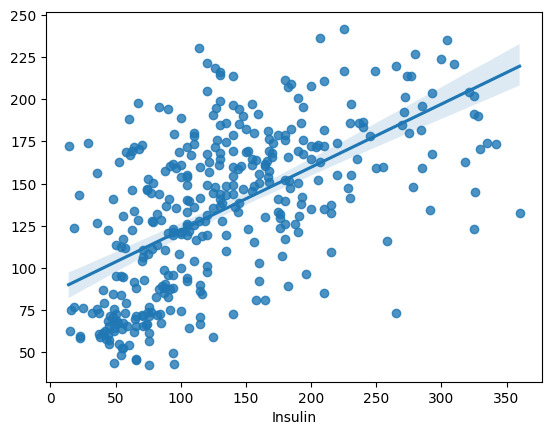

In [ ]:
# regplot 으로 결과 값을 비교합니다.

sns.regplot(x=y_train,y=y_predict)

In [ ]:
# r2_score 를 구합니다.

from sklearn.metrics import r2_score
r2_score(y_train,y_predict)

0.3429229983086708

<ipython-input-36-13543c6b0a72>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label="train")
<ipython-input-36-13543c6b0a72>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, hist=False, label="predict")


<Axes: xlabel='Insulin', ylabel='Density'>

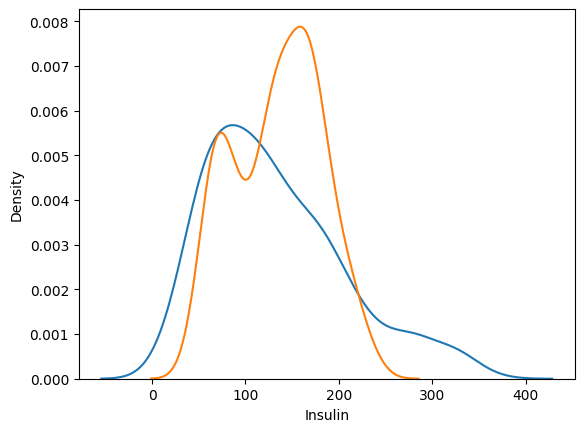

In [ ]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

## 오차 구하기

In [ ]:
# MAE
#86
#77.55 (Insulin<600)
#62.05 (Insulin<OUT)
#44.97 (RandomSearchCV)
error = abs(y_train-y_predict)
error.mean()

44.9797700586646

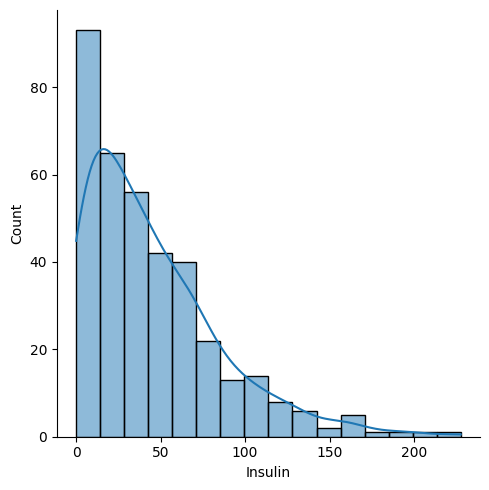

In [ ]:
# sns.distplot(error)
sns.displot(error, kde=True)

In [ ]:
error.describe()

count    370.000000
mean      44.979770
std       39.966215
min        0.002849
25%       14.235783
50%       34.689076
75%       65.794658
max      227.641119
Name: Insulin, dtype: float64

In [ ]:
# RMSE
#126.895
#114.077 (Insulin<600)
#84.111 (Insulin<OUT)
#60.13 (RandomSearchCV)
np.sqrt(((y_train-y_predict)**2).mean())

60.13452457682411

In [ ]:
# 피처의 중요도를 추출하기
best_estimator.feature_importances_

array([0.04910655, 0.40040139, 0.0703092 , 0.10048023, 0.12723235,
       0.10910213, 0.10172439, 0.04164376])

<Axes: >

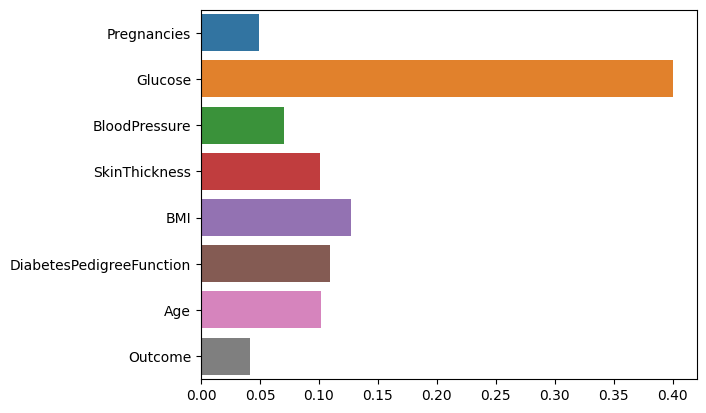

In [ ]:
# 피처의 중요도 시각화 하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [ ]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([181.94837022,  56.25768056, 191.94558766, 159.9642619 ,
       170.235     ])

In [ ]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [ ]:
test["Insulin"] = y_test

In [ ]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,135.904565,45.033895,46.360715,97.444167,140.962500,170.147589,236.084451
1,138.0,177.093734,29.504054,90.575243,158.944437,176.658863,193.987860,251.600000


<Axes: xlabel='Outcome', ylabel='Insulin'>

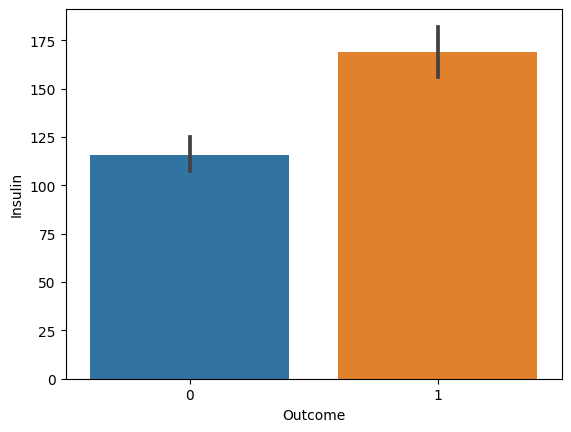

In [ ]:
# Insulin 평균값을 출력
sns.barplot(data=train, x='Outcome',y='Insulin')

<Axes: xlabel='Outcome', ylabel='Insulin'>

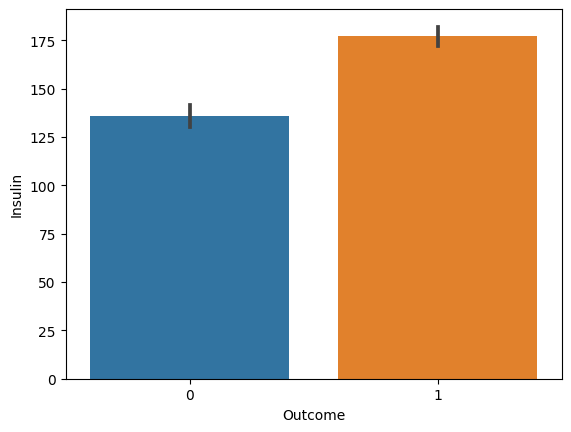

In [ ]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

##예측값을 CSV파일로 저장하기

In [ ]:
df.loc[df['Insulin'] == 0, 'Insulin']

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [ ]:
df.loc[df['Insulin'] == 0, 'Insulin'] = test['Insulin']

In [ ]:
df.to_csv('/content/drive/MyDrive/boostcourse_data/diabetes_fill_insulin.csv', index=False)

In [ ]:
pd.read_csv('/content/drive/MyDrive/boostcourse_data/diabetes_fill_insulin.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,181.948370,33.6,0.627,50,1
1,1,85,66,29,56.257681,26.6,0.351,31,0
2,8,183,64,0,191.945588,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,165.108907,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,161.180480,30.1,0.349,47,1
